**NOTEBOOK 12**

## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>  

The goal of exercise 12 is to use deep neural network models (DNN), implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adequate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

2024-09-28 15:25:33.077218: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 15:25:33.645439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 15:25:33.645607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 15:25:33.724920: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 15:25:33.918766: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-28 15:25:33.922841: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [16]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 9


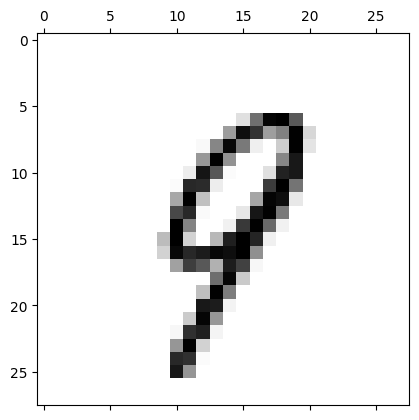

... and with label [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [17]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[22])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[22,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[22], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

**Define the Neural Net and its Architecture**

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(50, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


The DNN designed was then trained with three different optimizers: AdaDelta, SGD and Adam. Also, a dropout rate 0.5 was applied to the neural network. The dropout is a technique used in deep neural networks to avoid the overfitting of the model and it consists in turning off a randomly chosen fraction of the input data at each training session. 

**1-ADADELTA**

In [5]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(lr=1.0, rho=0.95,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


**Train the model**

In [6]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3000 - acc: 0.1286 - val_loss: 2.1957 - val_acc: 0.2518
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1671 - acc: 0.2162 - val_loss: 2.0687 - val_acc: 0.4311
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0491 - acc: 0.3043 - val_loss: 1.9386 - val_acc: 0.5615
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.9377 - acc: 0.3687 - val_loss: 1.8030 - val_acc: 0.6486
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8254 - acc: 0.4219 - val_loss: 1.6688 - val_acc: 0.7075
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7235 - acc: 0.4635 - val_loss: 1.5446 - val_acc: 0.7486
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6239 - acc: 0.5009 - val_loss: 1.4276 - val_acc: 0.7747
Epoch 8/20
1875/1875 [==============================] -

**Evaluate the Model Performance on the Unseen Test Data**

313/313 [==============================] - 1s 2ms/step - loss: 0.6782 - acc: 0.8719

Test loss: 0.6781768798828125
Test accuracy: 0.8719000220298767


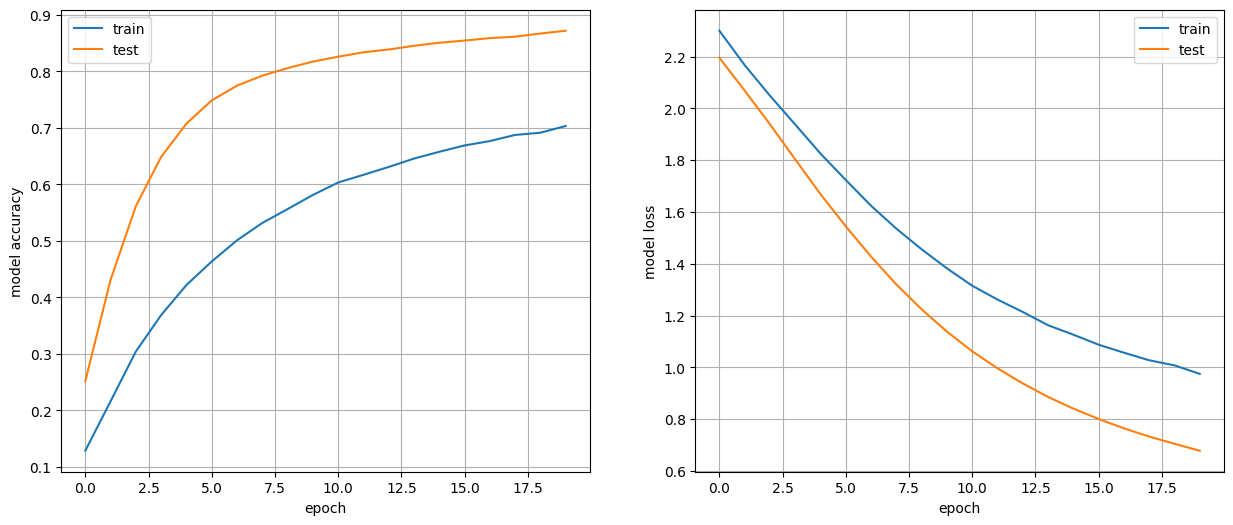

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


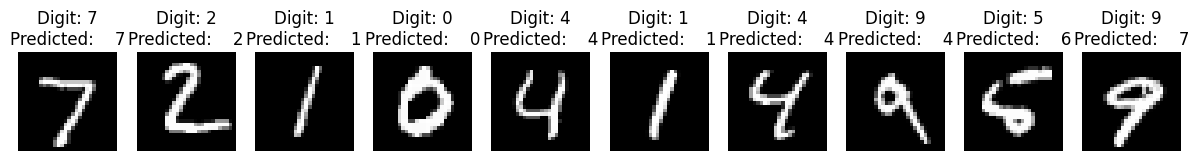

In [8]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**2-SGD**

In [12]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


**Train the model**

In [13]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8781 - acc: 0.7316 - val_loss: 0.2983 - val_acc: 0.9152
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4078 - acc: 0.8868 - val_loss: 0.2182 - val_acc: 0.9346
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3234 - acc: 0.9124 - val_loss: 0.1757 - val_acc: 0.9467
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2647 - acc: 0.9276 - val_loss: 0.1469 - val_acc: 0.9546
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2267 - acc: 0.9386 - val_loss: 0.1318 - val_acc: 0.9581
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1957 - acc: 0.9477 - val_loss: 0.1172 - val_acc: 0.9640
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1735 - acc: 0.9542 - val_loss: 0.1050 - val_acc: 0.9664
Epoch 8/20
1875/1875 [==============================] - 7s 4ms

**Evaluate the Model Performance on the Unseen Test Data**

313/313 [==============================] - 1s 2ms/step - loss: 0.0671 - acc: 0.9797

Test loss: 0.0670819878578186
Test accuracy: 0.9797000288963318


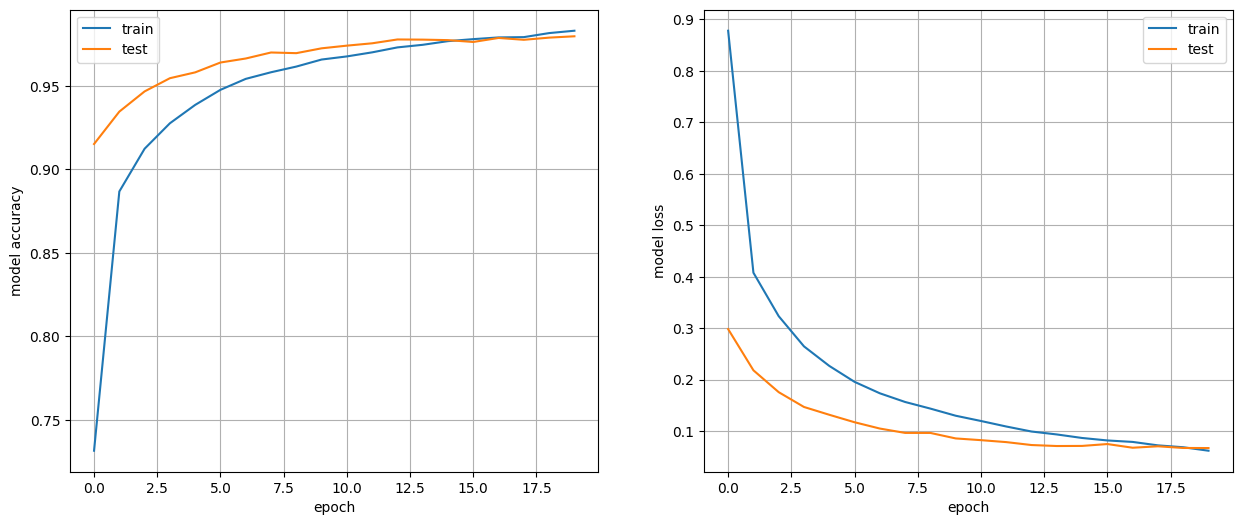

In [14]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


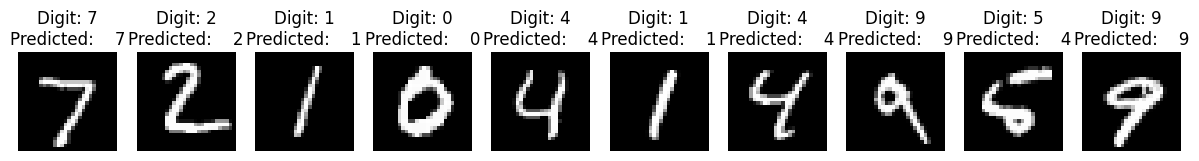

In [15]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**3-ADAM**

In [19]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


**Train the model**

In [20]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3395 - acc: 0.9055 - val_loss: 0.1280 - val_acc: 0.9611
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1399 - acc: 0.9628 - val_loss: 0.1003 - val_acc: 0.9696
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0984 - acc: 0.9736 - val_loss: 0.0950 - val_acc: 0.9739
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0792 - acc: 0.9788 - val_loss: 0.0932 - val_acc: 0.9741
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0641 - acc: 0.9829 - val_loss: 0.1056 - val_acc: 0.9752
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0526 - acc: 0.9856 - val_loss: 0.1165 - val_acc: 0.9720
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0475 - acc: 0.9866 - val_loss: 0.0985 - val_acc: 0.9807
Epoch 8/20
1875/1875 [==============================] -

**Evaluate the Model Performance on the Unseen Test Data**

313/313 [==============================] - 1s 2ms/step - loss: 0.1623 - acc: 0.9817

Test loss: 0.16230826079845428
Test accuracy: 0.9817000031471252


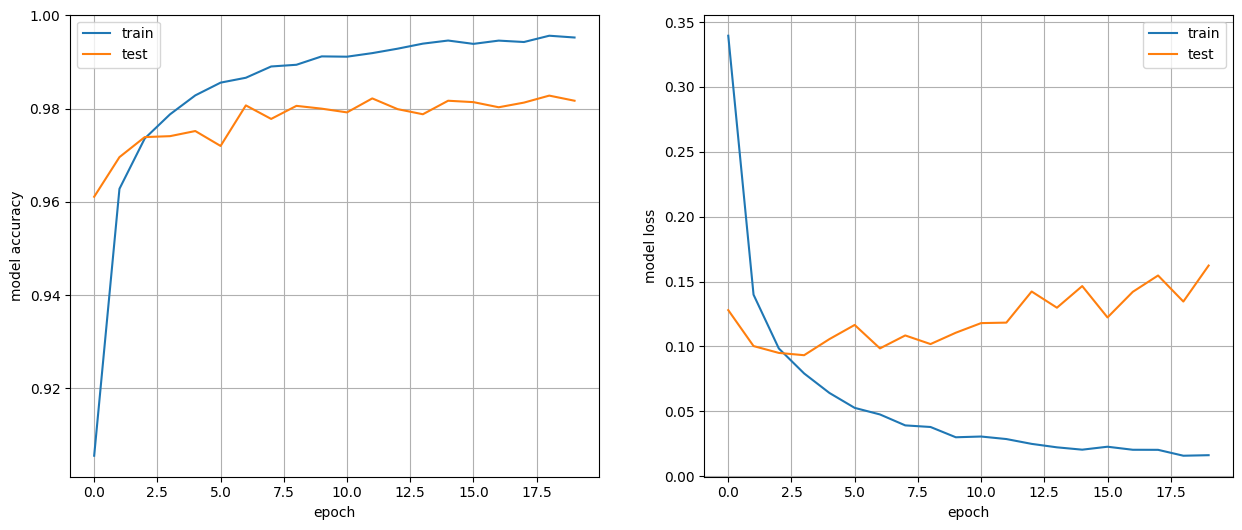

In [21]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 2ms/step


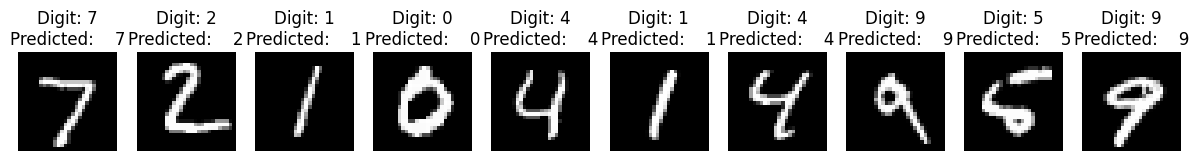

In [22]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Looking at the loss and accuracy curves, the DNN trained with the ADAM overfits the data and therefore it is not a good optimizer for this specific problem. On the other hand, the model with AdaDelta optimizer results in an underfitting of the data, as the DNN does not perform well on new data ingested. Among the three neural networks built the one with SGD optimizer provides the best results.  
All the models make good predictions on the handwritten digits considered. 

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

**Creating Convolutional Neural Nets with Keras**

In [23]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


**Define the Neural Net and its Architecture**

In [24]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(7, 7),
                     activation='relu',
                     input_shape=input_shape))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # add a convolution layer with 20 filters
    model.add(Conv2D(20, kernel_size=(3, 3),
                     activation='relu',))
    # apply a pooliing with dimension 4x4
    model.add(MaxPooling2D(pool_size=(4, 4)))
    # apply a standard flat layer
    model.add(Flatten())
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


**Train the model**

In [25]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_CNN = create_CNN()

# train DNN and store training info in history
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5640 - acc: 0.8233 - val_loss: 0.2205 - val_acc: 0.9452
Epoch 2/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2179 - acc: 0.9355 - val_loss: 0.1536 - val_acc: 0.9606
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1688 - acc: 0.9504 - val_loss: 0.1193 - val_acc: 0.9691
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1406 - acc: 0.9581 - val_loss: 0.1059 - val_acc: 0.9724
Epoch 5/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1265 - acc: 0.9630 - val_loss: 0.0949 - val_acc: 0.9754
Epoch 6/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1151 - acc: 0.9655 - val_loss: 0.0851 - val_acc: 0.9774
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1045 - acc: 0.9688 - val_loss: 0.0758 - val_acc: 0.9802
Epoch 8/20
1875/1875 [==========================

**Evaluate the Model Performance on the Unseen Test Data**

313/313 [==============================] - 1s 4ms/step - loss: 0.0543 - acc: 0.9848

Test loss: 0.05428388714790344
Test accuracy: 0.9847999811172485


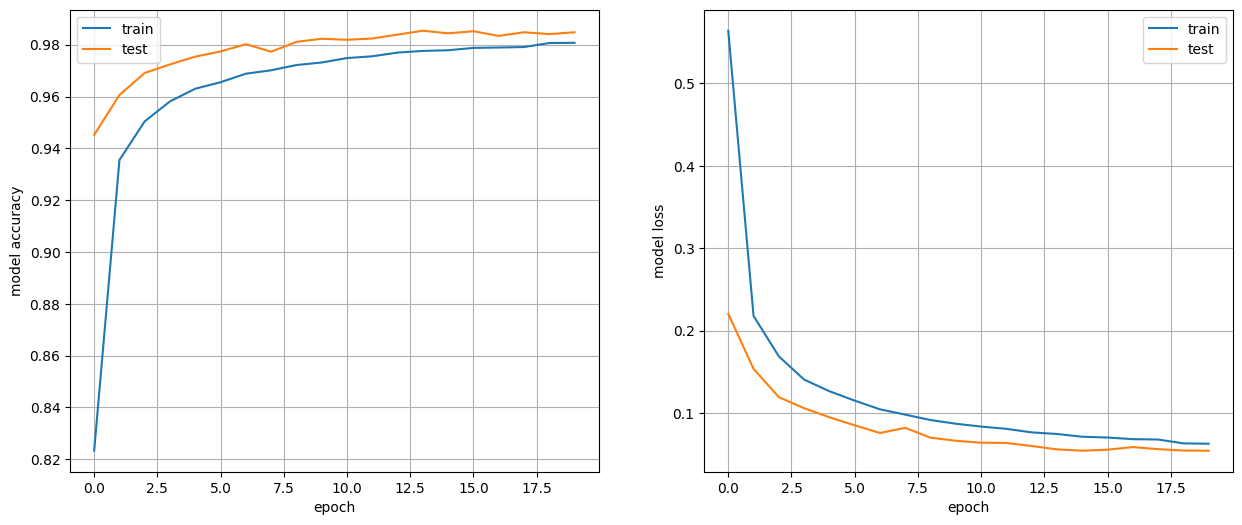

In [26]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15 , 6))

# summarize history for accuracy
ax0.plot(history.history['acc'])
ax0.plot(history.history['val_acc'])
ax0.set_ylabel('model accuracy')
ax0.set_xlabel('epoch')
ax0.legend(['train', 'test'], loc='best')
ax0.grid()

# summarize history for loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('model loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='best')
ax1.grid()
plt.show()

313/313 [==============================] - 1s 4ms/step


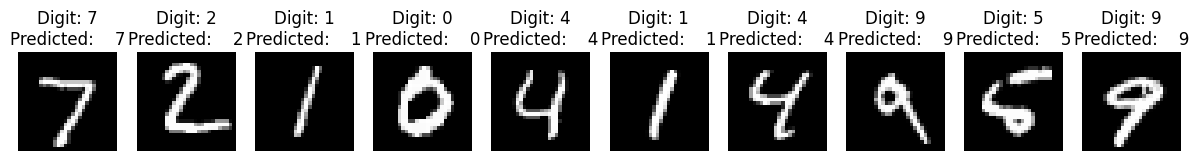

In [27]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

The CNN was built using SGD as the optimizer, given its good performances on the previous example. The plots for accuracy and loss show that the model achieves a better precision with respect to the DNN designed previously and this should not be a surprise: in fact, for this type of problem (image recognition) CNN are best suited. 

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

Image size: 28x28


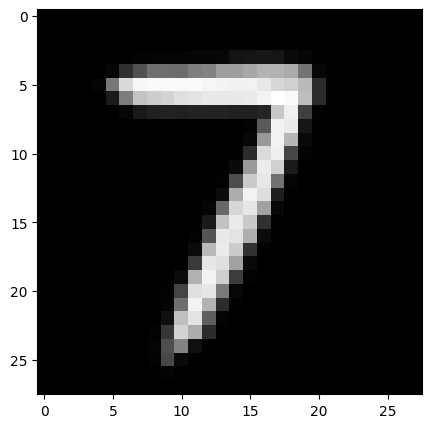

(28, 28)


In [28]:
from PIL import Image
import os

digit_filename = "./7_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

**Use the previous trained neural network**

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 22ms/step


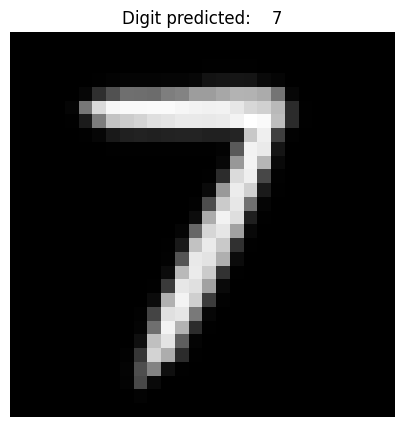

In [29]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

Image size: 28x28


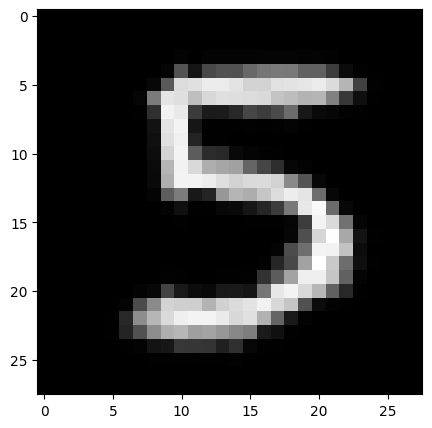

(28, 28)


In [30]:
digit_filename = "./5_write.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

(28, 28)
(1, 28, 28, 1)
1/1 [==============================] - 0s 20ms/step


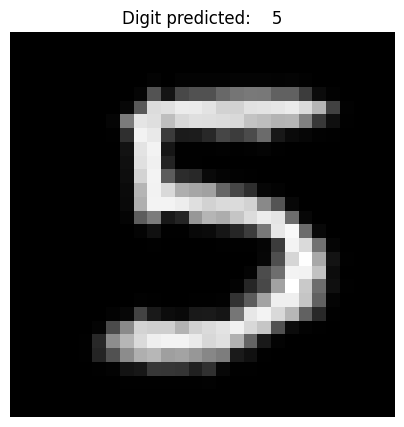

In [31]:
print(data.shape)
data = data.reshape(1,xdim,ydim,1)
print(data.shape)
pred_8 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_8)))
plt.axis('off') 
plt.show()

My 5 and 7 handwritten digits were recognized by the CNN I built in the previous exercise. This holds (I hope so) for all the other things I may write: it means that I am a good writer. 